In [7]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
df = pd.read_csv('Advertising.csv')
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [8]:
#X features 
X = df.drop('sales', axis=1)
X

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [9]:
#y label
y = df['sales']
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

In [11]:
polyconverter = PolynomialFeatures(degree=2, include_bias=False)  

In [13]:
poly_features = polyconverter.fit_transform(X)

In [14]:
poly_features

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]])

In [17]:
poly_features.shape

(200, 9)

In [19]:
X.shape

(200, 3)

In [21]:
help(train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)
    Split arrays or matrices into random train and test subsets
    
    Quick utility that wraps input validation and
    ``next(ShuffleSplit().split(X, y))`` and application to input data
    into a single call for splitting (and optionally subsampling) data in a
    oneliner.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.
    
    test_size : float or int, default=None
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to t

In [23]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=42)

In [25]:
model = LinearRegression()

In [26]:
model.fit(X_train,y_train)

LinearRegression()

In [28]:
predictions = model.predict(X_test)

In [33]:
MAE = mean_absolute_error(y_test, predictions)
RMSE = np.sqrt(mean_squared_error(y_test, predictions))

In [34]:
MAE

0.5905974833808024

In [38]:
RMSE

0.7233218473857527

In [71]:
train_rmse = []
test_rmse = []

for d in range(1,10):
    polyconvert = PolynomialFeatures(degree=d, include_bias=False)
    
    poly_feat = polyconvert.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(poly_feat, y, test_size=0.3, random_state=42)
    
    model = LinearRegression()
    
    model.fit(X_train,y_train)
    
    train_predict = model.predict(X_train)
    test_predict = model.predict(X_test)
    
    te_RMSE = np.sqrt(mean_squared_error(y_test, test_predict))
    tr_RMSE = np.sqrt(mean_squared_error(y_train, train_predict))
    
    test_rmse.append(te_RMSE)
    train_rmse.append(tr_RMSE)
    #print(train_rmse)
    

In [53]:
test_rmse #optimal is three!!!!!!

[1.9485372043446392,
 0.7233218473857527,
 0.5392350985666785,
 1.3032266003603192,
 5.946842935307123,
 26.38476839993306,
 599.3363123493482,
 2483.1346359034037,
 141973.33000831315]

In [58]:
train_rmse

[1.574596830590544,
 0.5950712355838925,
 0.46887581118220883,
 0.36946897017717967,
 0.2438220731868701,
 0.20151320121803631,
 0.6233792218764097,
 0.1554634694131466,
 0.15882613620707328]

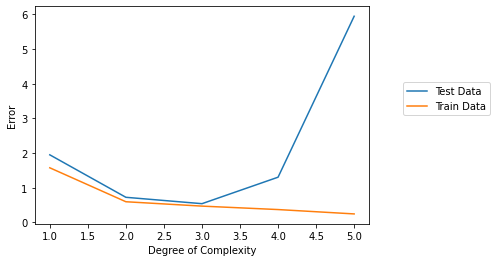

In [72]:
#an increase in complexity reduces the error up until 3, after which it incs
plt.plot(range(1,6), test_rmse[:5], label='Test Data')
plt.plot(range(1,6), train_rmse[:5], label='Train Data')

plt.xlabel('Degree of Complexity')
plt.ylabel('Error')

plt.legend(loc=[1.1,0.5])

plt.show()

## Conclusion: 3 is the optimal degree